# Credit Risk Project

#### This project is based on the Credit Risk Dataset I found on Kaggle.com <br>
Link to dataset: https://www.kaggle.com/datasets/laotse/credit-risk-dataset <br>
The data description could be found below:

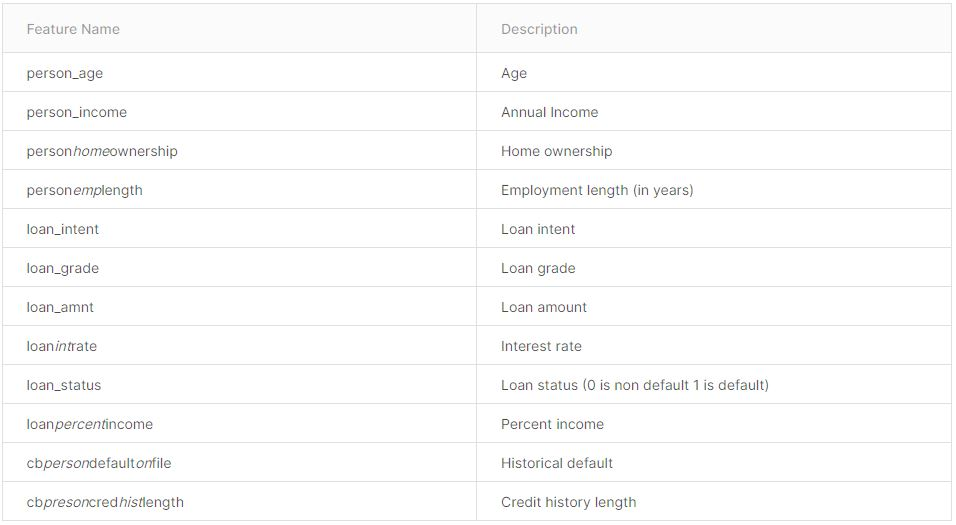

In [3]:
import numpy as np # linear algeabra
import pandas as pd # Data processing
import matplotlib as plt # Visualizations
import seaborn as sns # Statistical visualizations

%matplotlib inline

In [5]:
df = pd.read_csv("credit_risk_dataset.csv")

In [12]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


#### Checking and fixing null values 
*I decided to use the mean of person_emp_length and loan_int_rate* <br>
*to fill in the null values of each column*

In [10]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<AxesSubplot:>

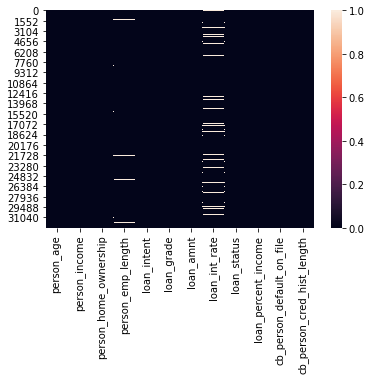

In [13]:
sns.heatmap(df.isnull())

In [14]:
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)

<AxesSubplot:>

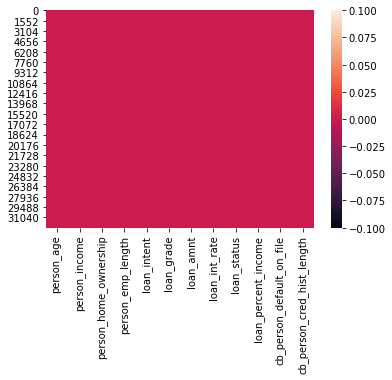

In [15]:
sns.heatmap(df.isnull())

#### Checking for outliers
*From checking the statistics from the describe function, we see there may be several outliers*

In [22]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:>

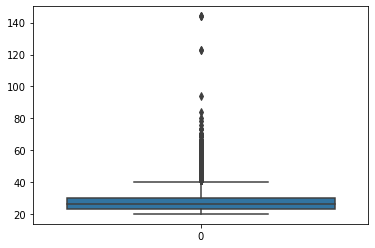

In [31]:
sns.boxplot(data=df.person_age)

<AxesSubplot:>

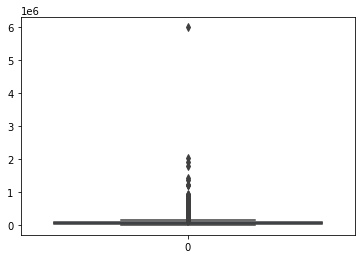

In [32]:
sns.boxplot(data=df.person_income)

To properly remove any outliers, I decided to replace the outliers with the 10th and 90th percentile of all entries.
- First for persons age:

In [34]:
ten_percent = np.percentile(df.person_age,10)
ninety_percent = np.percentile(df.person_age,90)
print(ten_percent, ninety_percent)

22.0 36.0


In [36]:
a = np.where(df.person_age < ten_percent, ten_percent, df.person_age )

In [38]:
b = np.where(a > ninety_percent, ninety_percent, a )

In [41]:
df['person_age'] = b

In [42]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.174273,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,4.563603,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,22.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,36.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:>

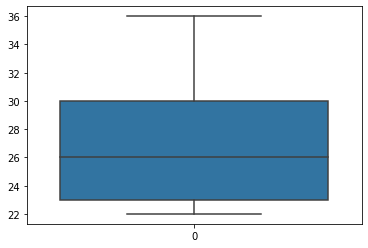

In [52]:
sns.boxplot(data=df.person_age)

- Now for person's income

In [44]:
ten_percent = np.percentile(df.person_income,10)
ninety_percent = np.percentile(df.person_income,90)
print(ten_percent, ninety_percent)

28590.0 110004.0


In [45]:
a = np.where(df.person_income < ten_percent, ten_percent, df.person_income )

In [46]:
b = np.where(a > ninety_percent, ninety_percent, a )

In [47]:
df['person_income'] = b

In [48]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.174273,60990.670176,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,4.563603,26341.966647,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,22.000000,28590.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,79200.000000,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,36.000000,110004.000000,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:>

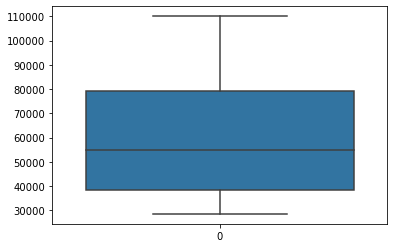

In [53]:
sns.boxplot(data=df.person_income)

### EDA

In [54]:
from matplotlib import rcParams

#### 1. Checking home ownership

<AxesSubplot:xlabel='person_home_ownership', ylabel='count'>

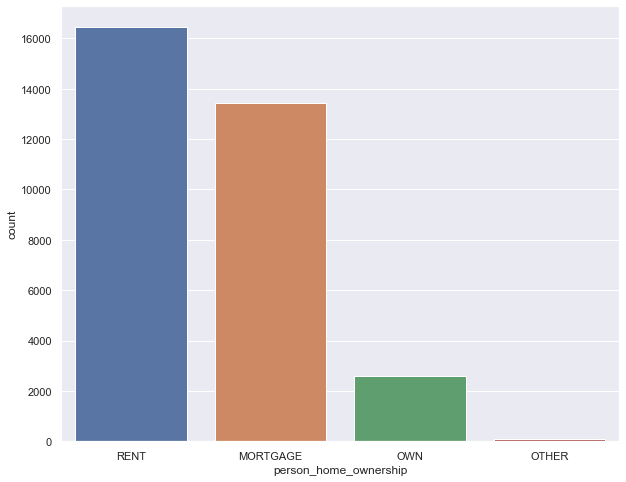

In [55]:
rcParams['figure.figsize'] = 10,8
sns.set(font_scale=1)
sns.countplot(x=df['person_home_ownership'], order=df['person_home_ownership'].value_counts().index)

#### 2. Checking why are people taking out these loans

In [50]:
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

<AxesSubplot:xlabel='loan_intent', ylabel='count'>

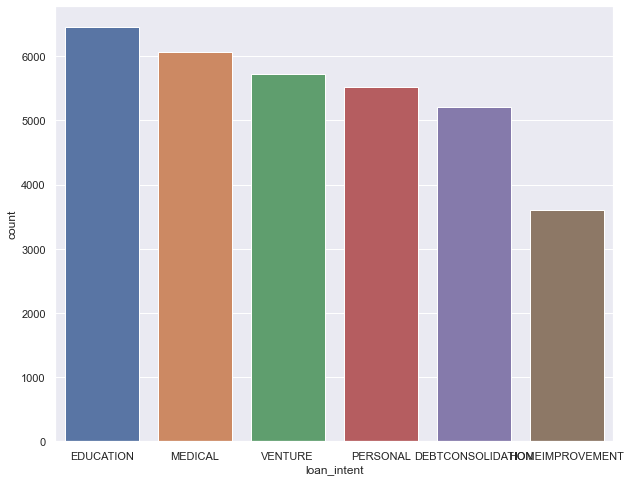

In [56]:
rcParams['figure.figsize'] = 10,8
sns.set(font_scale=1)
sns.countplot(x=df['loan_intent'], order=df['loan_intent'].value_counts().index)


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_intent', ylabel='count'>

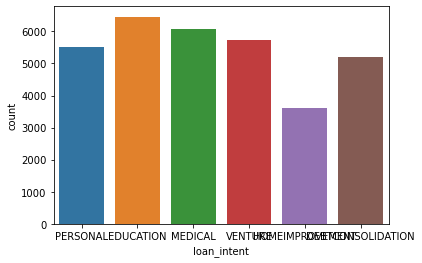

In [51]:
sns.countplot(df.loan_intent)